# Anomalous Text Detection with Hidden States

In [1]:
pip install numpy matplotlib scikit-learn gudhi pot -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
from gudhi.wasserstein.barycenter import lagrangian_barycenter
import numpy as np
import gudhi
from gudhi.wasserstein.barycenter import lagrangian_barycenter as bary
from gudhi.persistence_graphical_tools import plot_persistence_diagram

import numpy as np
import matplotlib.pyplot as plt

In [3]:
text_1 = ["Deep learning is a subfield of machine learning that's based on artificial neural networks with representation learning. It allows computational models composed of multiple layers to learn and represent data with multiple levels of abstraction, mimicking the human brain, thereby helping to decipher patterns and structures in data. Deep learning techniques have been widely applied in several industries and fields such as healthcare, finance, transportation, and more, offering solutions for image and speech recognition, natural language processing, and various other complex tasks.", 
          
          "The power of deep learning lies in its ability to automatically extract features from raw data. Traditional machine learning models require manual feature engineering, where the relevant features are extracted before applying the model. However, with deep learning, the model learns these features itself from the data, which reduces the need for human intervention. This aspect of deep learning has made it an integral part of many modern artificial intelligence systems.", 
          
          "Deep learning models are often built using a layered architecture where each layer learns to transform its input data into a slightly more abstract and composite representation. These layers are interconnected through nodes, or neurons, with each node in a layer connecting to each node in the next layer. The depth of these layers is where deep learning gets its name - 'deep' refers to the number of layers through which the data is transformed.", 
          
          "While deep learning has brought significant advancements, it is also accompanied by certain challenges. These include the need for large amounts of data to train models, the extensive computational power required, and the lack of transparency or interpretability of the models. Despite these challenges, the potential benefits that deep learning can bring to various fields make it an area of intense research and development.", 

          "Deep learning methods have exhibited remarkable success in a plethora of areas and are being increasingly used in the critical domain of healthcare. They are employed for a variety of tasks including disease detection, personalized treatment, drug discovery, and patient care. For instance, convolutional neural networks (CNNs) have shown promise in medical imaging analysis, helping doctors to identify diseases such as cancer at an early stage. Furthermore, recurrent neural networks (RNNs) are utilized in electronic health record data analysis, providing insightful information about patients' health trends and future risks.",

          "A pivotal aspect of deep learning is the concept of representation learning. Unlike traditional machine learning methods that rely on manually engineered features, deep learning algorithms are capable of learning useful features directly from raw data. This is particularly useful in complex domains such as natural language processing, image recognition, and speech recognition, where the design of suitable features can be challenging and time-consuming. By automatically learning these representations, deep learning can achieve state-of-the-art performance on a variety of tasks.", 

          "Deep learning models, like artificial neural networks, are designed to simulate the way the human brain analyzes and processes information. These models are composed of multiple layers of artificial neurons or nodes, each of which can process inputs, apply a set of functions, and pass the result to the next layer. This hierarchical structure allows deep learning models to handle complex tasks by breaking them down into simpler, manageable sub-tasks. This capability has led to breakthroughs in various fields, from computer vision to natural language understanding.", 

          "A compelling advantage of deep learning is its ability to process and generate meaningful information from big data. As the amount of data generated by various sources such as social media, sensors, and IoT devices continues to grow, the need for advanced tools to analyze this data becomes more significant. Deep learning, with its ability to learn from vast amounts of data and generate accurate predictions, is perfectly suited for this task. It has found applications in areas such as predictive maintenance, fraud detection, and customer behavior analysis.", 

          "Despite the numerous successes of deep learning, it is essential to mention its challenges and areas for improvement. One of the key issues is the requirement for large amounts of labeled data to train the models effectively. Obtaining this data can be expensive and time-consuming. Moreover, deep learning models are often criticized for their lack of interpretability; they are frequently referred to as black boxes due to their complex internal workings. Research is being conducted to develop methods for better understanding and visualizing these models, which will not only enhance trust in their predictions but also improve their overall performance.", 
                    
          "Deep learning, a subset of machine learning, is a method that is based on artificial neural networks with representation learning. Representation learning can automatically discover the representations needed for feature detection or classification from raw data. This replaces the manual feature engineering used in traditional machine learning. Deep learning models are loosely related to information processing and communication patterns in a biological nervous system, such as neural coding that attempts to define a relationship between various stimuli and associated neuronal responses in the brain.", 
          
          "Convolutional Neural Networks (CNNs) are a class of deep learning algorithms that have proven extremely effective for analyzing visual imagery. They are designed to automatically and adaptively learn spatial hierarchies of features from tasks with only minimal pre-processing. They have been applied to fields including bioinformatics, drug design, medical image analysis, natural language processing, and even in the process of creating art.", 

          "Recurrent Neural Networks (RNNs) are another class of deep learning models, and they excel at handling sequential data. Unlike feedforward neural networks, RNNs have a form of internal memory that allows them to remember previous inputs in the sequence. This unique feature of RNNs makes them particularly well-suited for tasks like language modeling, translation, and speech recognition.", 

          "Another exciting area in deep learning is the use of Generative Adversarial Networks (GANs). GANs are a class of artificial intelligence algorithms used in unsupervised machine learning, implementing two neural networks contesting with each other in a game. One network, the generator, generates new data instances, while the other, the discriminator, evaluates them for authenticity. The generator improves its ability to generate more realistic data, and the discriminator enhances its ability to distinguish real data from the artificially generated ones. This dynamic creates a powerful tool for generating synthetic data.",
          
          "Deep learning, a subset of machine learning, has revolutionized the field of artificial intelligence by enabling computers to learn and make decisions in a manner similar to humans. At the heart of deep learning are neural networks, computational models inspired by the structure and function of the human brain. These networks consist of interconnected nodes, or artificial neurons, organized in layers. Each layer extracts and transforms information before passing it on to the next layer, gradually learning to recognize patterns and make accurate predictions. Through a process called training, neural networks adjust their parameters based on labeled data, optimizing their ability to perform tasks such as image recognition, natural language processing, and voice synthesis.",

          "Neural networks are known for their ability to handle complex and high-dimensional data, making them highly effective in fields such as computer vision and speech recognition. Convolutional neural networks (CNNs), a type of neural network widely used in computer vision tasks, are designed to recognize visual patterns and features by applying filters to input images. Recurrent neural networks (RNNs), on the other hand, are particularly suited for sequential data analysis, such as natural language processing and time series prediction. With their ability to retain information from previous steps, RNNs excel at capturing context and dependencies in sequential data.",

          "One of the key advantages of deep learning and neural networks is their ability to learn hierarchical representations of data. In deep neural networks, multiple layers learn increasingly abstract and complex features, allowing the model to capture intricate patterns that may be difficult to define explicitly. This hierarchical learning enables neural networks to automatically extract relevant features from raw data, reducing the need for manual feature engineering, which can be time-consuming and challenging. Instead, deep learning models can autonomously discover meaningful representations from the data, resulting in more accurate and adaptable systems.",

          "While deep learning and neural networks have achieved remarkable success in various domains, they also pose challenges. Training deep neural networks typically requires large amounts of labeled data, which can be expensive and time-consuming to obtain. Additionally, training deep models can be computationally intensive, requiring significant computational resources and time. To address these challenges, researchers have explored techniques such as transfer learning, which leverages pre-trained models on large datasets to boost performance on smaller, specialized tasks. Furthermore, advancements in hardware, such as graphics processing units (GPUs) and specialized accelerators like tensor processing units (TPUs), have significantly accelerated training and inference in neural networks.",

          "The future of deep learning and neural networks holds great promise. Ongoing research focuses on developing more efficient and interpretable architectures, improving generalization capabilities, and addressing issues related to robustness, fairness, and transparency. Additionally, efforts are being made to integrate deep learning with other branches of AI, such as reinforcement learning, to create even more powerful and versatile systems. As the field continues to evolve, deep learning and neural networks are likely to play a crucial role in driving advancements across a wide range of industries, from healthcare and finance to transportation and beyond.",
          
          ]

text_2 = ["Let's consider the topic of sustainable agriculture. This practice refers to the production of food, fiber, or other plant or animal products using farming techniques that protect the environment, public health, human communities, and animal welfare. It equires a deep understanding of natural processes. This field is focused on long-term solutions that aim to balance current needs with the future availability of natural resources. Sustainable agriculture techniques may include crop rotation, biological pest control, and the reduction of chemical fertilizers and pesticides.", 
          
          "The color blue is often associated with feelings of calmness and serenity. It's the hue of the clear sky and the deep sea, and in the world of art, it's a color that's been used to great effect by painters like Vincent van Gogh and Pablo Picasso. According to color psychology, blue can also symbolize trust, loyalty, and wisdom. In the natural world, blue is less common among plants and animals, which may be why we find it so striking when we see a blue flower or bird.",
          
          "In recent years, modern healthcare has witnessed remarkable advancements, transforming the way medical professionals diagnose, treat, and prevent diseases. Technological innovations have revolutionized the field, leading to more accurate diagnoses through advanced imaging techniques such as MRI and CT scans. Moreover, robotic surgeries have enabled surgeons to perform complex procedures with enhanced precision and reduced invasiveness. The advent of electronic health records (EHRs) has streamlined patient information management, improving coordination among healthcare providers. Telemedicine has gained significant traction, allowing patients to consult with doctors remotely, ensuring accessible healthcare, especially in rural areas. Artificial intelligence and machine learning are also making strides in healthcare, facilitating early disease detection and personalized treatment plans.", 
          
          "Skiing is a popular winter sport that combines adventure, athleticism, and the joy of being in the great outdoors. Skiers glide down snow-covered slopes, equipped with skis, boots, and poles, providing them with balance and control. From the beginner's gentle slopes to the adrenaline-pumping black diamond trails, skiing offers something for everyone. Ski resorts around the world provide a range of amenities, including ski lifts, ski schools, and rental equipment, catering to skiers of all levels. The sport also promotes physical fitness, strengthening the leg muscles, improving cardiovascular health, and enhancing overall coordination. Additionally, skiing can be a social activity, as friends and families come together to enjoy the slopes and embrace the breathtaking beauty of snow-capped mountains.",

          "Zombies have captivated popular culture, appearing in numerous books, movies, and TV shows. These fictional creatures, often portrayed as reanimated corpses, evoke a sense of fear and fascination. Originating from Haitian folklore, zombies gained prominence through George A. Romero's classic film Night of the Living Dead. Zombies are typically depicted as mindless, ravenous beings with an insatiable hunger for human flesh. They symbolize various societal fears, such as the collapse of civilization, infectious diseases, and the loss of individuality. While their nature varies across different media, the relentless pursuit of survivors and the struggle for survival remain common themes. Zombies have become a popular trope in the horror genre, providing a thrilling and often thought-provoking exploration of human nature and our ability to endure in the face of adversity.",

          "The concept of alien invasions has long fascinated humanity, sparking our imagination about the existence of extraterrestrial life and their potential encounters with Earth. Countless science fiction stories, movies, and games have explored the theme of alien invasions, presenting scenarios ranging from peaceful first contact to hostile takeovers. These narratives often delve into questions about humanity's resilience, resourcefulness, and ability to unite against a common threat. Alien invasions serve as a metaphor for human anxieties, exploring themes such as the fear of the unknown, the fragility of our existence, and the consequences of our actions. They also encourage contemplation about our place in the universe and the potential for interstellar exploration and cooperation.",

          "Comic books have been a beloved form of entertainment for decades, offering a unique blend of visual art and storytelling. These colorful narratives feature superheroes, villains, and everyday people navigating extraordinary worlds and grappling with complex moral dilemmas. Comic book characters such as Superman, Batman, and Spider-Man have become cultural icons, inspiring generations with their tales of heroism and personal growth. The medium allows for diverse storytelling styles, ranging from action-packed adventures to introspective dramas. With their blend of captivating visuals and compelling narratives, comic books transcend age boundaries, appealing to both children and adults alike. They have also served as the source material for blockbuster movies and TV series, further cementing their cultural significance."
          
          ] 



In [4]:
import torch
from transformers import BertTokenizer, BertModel
from transformers import BertModel, BertTokenizerFast
from transformers import AutoTokenizer, AutoModel
from scipy.spatial import distance_matrix
import gudhi as gd
import numpy as np
import matplotlib.pyplot as plt


def compute_output(sentence, layer):
    # Load pre-trained model
    tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')
    model = AutoModel.from_pretrained("xlm-roberta-base") 

    # Tokenize input and convert to tensor
    inputs = tokenizer(sentence, return_tensors="pt")

    # Forward pass
    # Specify `output_hidden_states=True` when calling the model
    outputs = model(**inputs, output_attentions=True, output_hidden_states=True)

    # Obtain the hidden states
    model.eval()
    with torch.no_grad():
        hidden_states = outputs.hidden_states[layer]

    return hidden_states



def compute_phrase_distances_and_homology(context_vectors, sentence, phrase):
    # Initialize the tokenizer
    tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')

    # Tokenize the sentence and the phrase
    sentence_tokens = tokenizer.encode(sentence, add_special_tokens=False)
    phrase_tokens = tokenizer.encode(phrase, add_special_tokens=False)

    # Find the indices of the phrase tokens in the sentence
    phrase_indices = []
    phrase_length = len(phrase_tokens)
    for i in range(len(sentence_tokens) - phrase_length + 1):
        if sentence_tokens[i:i+phrase_length] == phrase_tokens:
            phrase_indices.extend(range(i, i+phrase_length))
            break

    # Extract the context vectors for the phrase
    phrase_context_vectors = context_vectors[0, phrase_indices]

    # Detach the tensor and convert to numpy array
    phrase_context_vectors_np = phrase_context_vectors.detach().numpy()

    # Compute the pairwise Euclidean distances among the phrase context vectors
    distances = distance_matrix(phrase_context_vectors_np, phrase_context_vectors_np)

    # Compute the persistent homology of the distance matrix
    rips_complex = gd.RipsComplex(distance_matrix=distances, max_edge_length=np.max(distances))
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    persistent_homology = simplex_tree.persistence(min_persistence=0.001)

    return persistent_homology



In [5]:
# Set the layer and head to use for computation
layer = 11

# Compute the context vectors for each text in the corpus
context_1 = [compute_output(t, layer) for t in text_1]
context_2 = [compute_output(t, layer) for t in text_2]

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a m

In [6]:
context_1[0].shape

torch.Size([1, 117, 768])

In [7]:
diag1 = [compute_phrase_distances_and_homology(context_1[i], text_1[i], text_1[i]) for i in range(len(text_1))]
diag2 = [compute_phrase_distances_and_homology(context_2[i], text_2[i], text_2[i]) for i in range(len(text_2))]


In [8]:
def convert_persistence_diagram(diagram):
    return np.array([point[1] for point in diagram if point[1][1] != np.inf])

# Convert your diagrams
dg1 = [convert_persistence_diagram(diagram) for diagram in diag1]
dg2 = [convert_persistence_diagram(diagram) for diagram in diag2]


# Now try the barycenter computation again
pdiagset = [dg1[i] for i in range(len(dg1))]
bary = lagrangian_barycenter(pdiagset=pdiagset,init=3)
print(bary)

[[11.51921128 13.56015527]
 [10.94509315 12.43056962]
 [12.03585542 13.83792535]
 [12.6081361  13.89885314]
 [12.89500267 14.31537249]
 [11.43177547 12.78743186]
 [11.98257991 13.45493926]
 [12.28499687 13.67554348]
 [12.11492135 13.28791935]
 [12.73618478 13.74686275]
 [11.73231076 13.05437079]
 [12.28472554 13.39055168]
 [12.19569688 13.20553137]
 [12.70655929 13.54187827]
 [12.96008955 13.77720466]
 [12.98225317 13.93757308]
 [12.48222679 13.45401118]
 [13.62549559 14.47489327]
 [13.4777424  14.11963132]
 [11.87497578 12.82522546]
 [12.41312009 13.2882758 ]
 [13.13748767 14.05199857]
 [12.07079696 13.05736131]
 [12.17183901 12.94111501]
 [11.42871636 12.15052293]
 [12.74190707 13.41311531]
 [13.79220843 15.21481137]
 [13.06840788 13.71565963]
 [13.32325476 13.96959562]
 [13.26433645 13.81006699]
 [12.46700491 13.1920303 ]
 [13.94967827 14.71740442]
 [12.56998535 13.10400131]
 [11.80656066 12.50875093]
 [12.86513575 13.33652409]
 [12.42904054 13.01114908]
 [12.67281326 13.27208103]
 

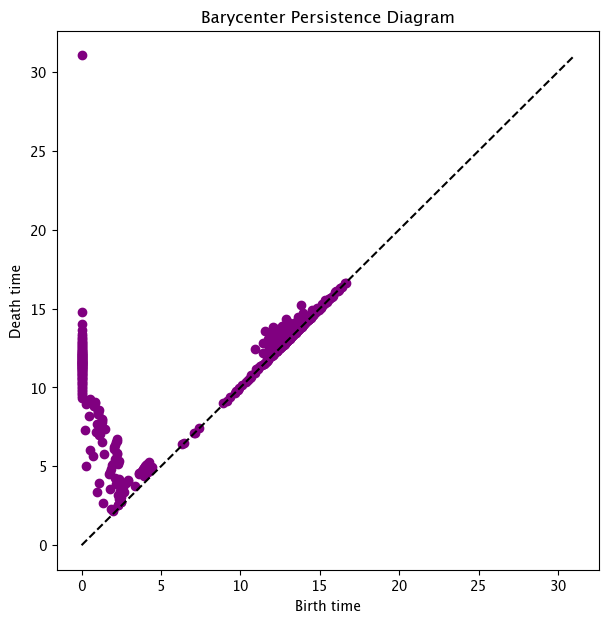

In [9]:
import matplotlib.pyplot as plt

# Convert the barycenter back into a list of tuples format
bary_as_tuples = [(0, tuple(point)) for point in bary]

# Separate birth and death times for plotting
birth_times, death_times = zip(*[point[1] for point in bary_as_tuples])

plt.figure(figsize=(7,7))
plt.scatter(birth_times, death_times, color='purple')
plt.plot([0, max(death_times)], [0, max(death_times)], 'k--')  # diagonal line
plt.title('Barycenter Persistence Diagram')
plt.xlabel('Birth time')
plt.ylabel('Death time')
plt.show()

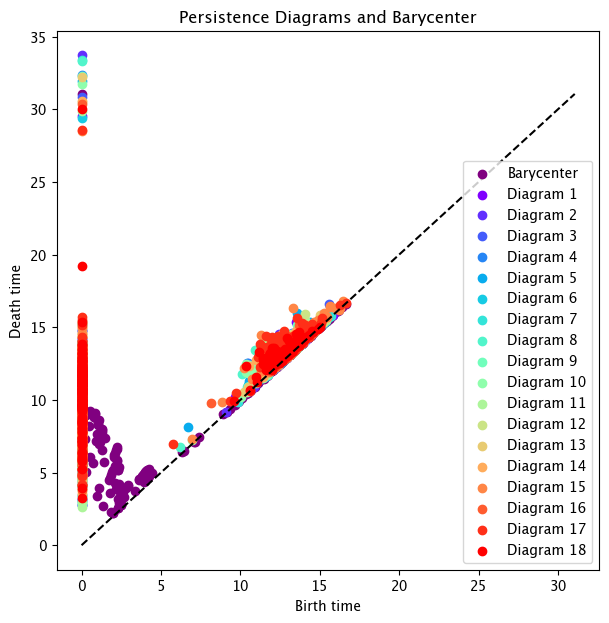

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Convert the barycenter back into a list of tuples format
bary_as_tuples = [(0, tuple(point)) for point in bary]

# Separate birth and death times for plotting
birth_times_bary, death_times_bary = zip(*[point[1] for point in bary_as_tuples])

plt.figure(figsize=(7,7))

# Plot the barycenter
plt.scatter(birth_times_bary, death_times_bary, color='purple', label='Barycenter')

# Plot the original diagrams
colors = cm.rainbow(np.linspace(0, 1, len(dg1)))
for idx, diag in enumerate(dg1):
    birth_times, death_times = zip(*diag)
    plt.scatter(birth_times, death_times, color=colors[idx], label=f'Diagram {idx+1}')

plt.plot([0, max(death_times_bary)], [0, max(death_times_bary)], 'k--')  # diagonal line
plt.title('Persistence Diagrams and Barycenter')
plt.xlabel('Birth time')
plt.ylabel('Death time')
plt.legend()
plt.show()

In [11]:
import numpy as np
from gudhi import wasserstein

# Convert diagrams and barycenter into the correct format
diagrams_np = [np.array(diag) for diag in dg1]
bary_diag_np = np.array(bary)

# Compute the Wasserstein distance between each diagram and the barycenter
distances_to_barycenter = [wasserstein.wasserstein_distance(diag, bary_diag_np) for diag in diagrams_np]

distances_to_barycenter


[111.03222901564182,
 226.2373640459823,
 147.89299759490567,
 214.37096564434174,
 147.99159209271056,
 111.37065129449408,
 129.6799897147143,
 112.96682154173364,
 159.62085659915468,
 118.4330773599362,
 155.54639666172744,
 192.39290941336674,
 156.2824460762058,
 259.35598397622744,
 181.48171359721067,
 128.07897392601888,
 349.57843404073174,
 152.09518596752486]

In [12]:
# Compute the desired statistics
max_distance = np.max(distances_to_barycenter)
min_distance = np.min(distances_to_barycenter)
mean_distance = np.mean(distances_to_barycenter)
median_distance = np.median(distances_to_barycenter)
variance = np.var(distances_to_barycenter)
standard_deviation = np.std(distances_to_barycenter)
first_quantile = np.percentile(distances_to_barycenter, 25)
third_quantile = np.percentile(distances_to_barycenter, 75)

# Compute outliers
iqr = third_quantile - first_quantile
lower_bound = first_quantile - 1.5 * iqr
upper_bound = third_quantile + 1.5 * iqr
outliers = [x for x in distances_to_barycenter if x > upper_bound]

# Print the results
print(f"Max distance: {max_distance}")
print(f"Min distance: {min_distance}")
print(f"Mean distance: {mean_distance}")
print(f"Median distance: {median_distance}")
print(f"Variance: {variance}")
print(f"Standard deviation: {standard_deviation}")
print(f"First quantile: {first_quantile}")
print(f"Third quantile: {third_quantile}")
print(f"Outliers: {outliers}")

Max distance: 349.57843404073174
Min distance: 111.03222901564182
Mean distance: 169.68936603125715
Median distance: 153.82079131462615
Variance: 3555.7748032046557
Standard deviation: 59.63031781908139
First quantile: 128.47922787319274
Third quantile: 189.6651104593277
Outliers: [349.57843404073174]


## False Positives?

Sometimes, there are false positives, as can be expected. An interesting question to ask is what about these make them outliers. 

In [13]:
# Compute outliers
iqr = third_quantile - first_quantile
# lower_bound = first_quantile - 1.5 * iqr
upper_bound = third_quantile + 1.5 * iqr
outlier_indices = [i for i, x in enumerate(distances_to_barycenter) if x > upper_bound]

# Print the results
print(f"Max distance: {max_distance}")
print(f"Min distance: {min_distance}")
print(f"Mean distance: {mean_distance}")
print(f"Median distance: {median_distance}")
print(f"Variance: {variance}")
print(f"Standard deviation: {standard_deviation}")
print(f"First quantile: {first_quantile}")
print(f"Third quantile: {third_quantile}")
print(f"Outliers: {outlier_indices}")

# Print the outlier texts
for i in outlier_indices:
    print(f"\nOutlier Text {i+1}:")
    print(text_1[i])


Max distance: 349.57843404073174
Min distance: 111.03222901564182
Mean distance: 169.68936603125715
Median distance: 153.82079131462615
Variance: 3555.7748032046557
Standard deviation: 59.63031781908139
First quantile: 128.47922787319274
Third quantile: 189.6651104593277
Outliers: [16]

Outlier Text 17:
While deep learning and neural networks have achieved remarkable success in various domains, they also pose challenges. Training deep neural networks typically requires large amounts of labeled data, which can be expensive and time-consuming to obtain. Additionally, training deep models can be computationally intensive, requiring significant computational resources and time. To address these challenges, researchers have explored techniques such as transfer learning, which leverages pre-trained models on large datasets to boost performance on smaller, specialized tasks. Furthermore, advancements in hardware, such as graphics processing units (GPUs) and specialized accelerators like tenso

In [14]:
# Convert the persistence diagram
# last_diag_2
anomalies = [convert_persistence_diagram(diagram) for diagram in diag2]
# Convert the diagrams to numpy arrays
anomalies_np = [np.array(anomaly) for anomaly in anomalies]
bary_diag_np = np.array(bary)

# Compute the Wasserstein distance
anomalous_wasserstein_distances = [wasserstein.wasserstein_distance(anomalies_np[i], bary_diag_np) for i in range(len(anomalies))]
print("The Wasserstein distance between the anomalous diagrams and the Fréchet mean diagram is: ", anomalous_wasserstein_distances)


The Wasserstein distance between the anomalous diagrams and the Fréchet mean diagram is:  [110.10814565431973, 114.31307255657805, 367.28340552866143, 427.78468206464447, 601.2499813379794, 345.1165496478257, 374.781216461917]


In [15]:
# Compute IQR
IQR = third_quantile - first_quantile

# Define the outlier thresholds
# lower_threshold = first_quantile - 1.5 * IQR
upper_threshold = third_quantile + 1.5 * IQR

# Check if the Wasserstein distance of the last text is an outlier
is_outlier = [[anomalous_wasserstein_distances[i] > upper_threshold] for i in range(len(anomalous_wasserstein_distances))]

print(f"Is the Wasserstein distance of the last text an outlier? {is_outlier}")


Is the Wasserstein distance of the last text an outlier? [[False], [False], [True], [True], [True], [True], [True]]


## Some Heuristics and Guiding Principles

We must note that this form of anomalous text detection is not perfect, and as seen above, there are false positive and false negatives. There are some things we should keep in mind while using this methods of anomaly detection. The length of the text matters. If one of the texts is significantly larger that the others in terms of token count, then it has a higher chance of being labeled an anomaly, regardless of whether it is on the same topic as the baseline texts. The next thing to keep in mind is that if the baseline texts too loosely clustered around the Fréchet mean, this makes detecting outliers (anomalous text) more difficult. This can happen if the topics mentioned in the baseline texts are only loosely related in content. For example, if we have baseline text talking more extensively about the applications of deep learning to healthcare, with an emphasis on healthcare applications, this will likely be considered an outlier in the initial calculation of the Féchet mean. This also leaves us open to the possibility of *not detecting* a text about healthcare instead of deep learning as anomalous. We must also note that some models perform better at this than others. For example, `xlm-roberta-large` forms better persistent homology features than `xlm-roberta-base` on average. We must also take note of the fact that certain heads may perform better than others for certain topic classes as well. This is an interesting feature of this analysis that is as much about anomaly detection as it is about analyzing the topics modeled by individual heads of the model. 